In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, make_scorer
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv("secom_lr.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [13]:
df

,Pass/Fail,v0,v10,v100,v101,v102,v107,v108,v112,v113,...,v86,v87,v89,v9,v90,v91,v93,v94,v98,v99
0,0,0.212406,-0.330435,0.50,1.0,1.962264,-2.545642,3.241076,0.096448,-0.029197,...,-0.278261,-1.666667,-0.171053,0.911458,-0.304514,-3.521505,0.038462,0.5,0.978938,-0.421141
1,0,0.933964,-1.321739,-1.00,-2.0,-1.088534,0.796287,-0.767726,0.486926,-0.284672,...,-0.550725,0.171171,-0.062500,0.041667,-0.860221,1.563441,0.076923,-2.5,-2.303978,-0.265101
2,0,-0.257246,-0.321739,-0.50,0.0,-1.011611,-0.498195,-1.038631,0.100148,0.729927,...,-0.067633,0.261261,0.213816,-0.578125,-1.282571,0.748387,-0.730769,-0.5,0.043601,-0.327181
3,0,0.226982,-0.660870,1.00,-1.5,1.013062,-0.824136,-1.877751,-0.412926,-0.291971,...,0.948792,0.243243,-0.210526,-0.093750,0.414045,0.480645,0.038462,-0.5,-1.651435,-0.280201
4,0,-0.729791,0.443478,-0.50,-0.5,0.387518,-2.682826,1.410269,0.198816,-0.270073,...,-0.568116,0.117117,0.677632,0.937500,-1.987431,-1.216129,-0.076923,-1.0,-0.551792,-0.703020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1,-0.260918,-0.026087,0.50,-1.0,0.767779,-1.112945,0.109535,0.054267,-0.956204,...,-0.786473,0.072072,-0.226974,-0.421875,0.733834,-2.010753,0.423077,-1.0,-1.138071,-0.577181
1563,1,0.457747,-0.539130,2.50,-1.0,-0.635704,-0.846828,-0.307090,0.537987,0.583942,...,0.879227,-0.090090,0.763158,-0.125000,-0.423207,0.123656,0.461538,0.5,-0.863407,-0.671141
1564,1,-0.667594,-0.373913,0.00,-0.5,-0.341074,-0.157813,0.114425,-0.420079,0.153285,...,0.206763,0.180180,-0.575658,-0.072917,0.094760,1.626882,-0.423077,-0.5,-0.799852,0.500000
1565,1,1.795160,-0.530435,0.75,0.0,0.557329,-1.129448,1.013203,0.979033,-0.532847,...,0.805797,0.153153,-0.082303,-1.380208,0.000000,-1.689247,-0.653846,0.0,-0.178347,0.686242


In [14]:
X = df.drop("Pass/Fail", axis=1)
y = df["Pass/Fail"].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify = y)

In [16]:
from sklearn.model_selection import train_test_split

## SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
# train 데이터에서 오버샘플링 시키기
x_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 오버샘플링 적용 후 데이터 레이블 개수 살펴보기
print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', x_train_over.shape, y_train_over.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_train_over).value_counts())

오버샘플링 전 : (1253, 226) (1253,)

오버샘플링 후 : (2340, 226) (2340,)

오버샘플링 전 레이블 분포 :
 0    1170
1      83
dtype: int64

오버샘플링 후 레이블 분포 :
 1    1170
0    1170
dtype: int64


Class=0, n=1170 (74.665%)
Class=1, n=83 (5.297%)


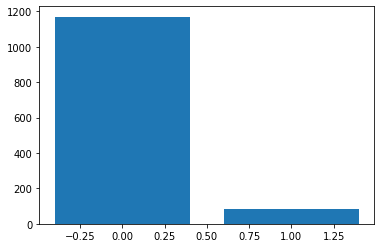

In [18]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
#plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=1170 (74.665%)
Class=1, n=1170 (74.665%)


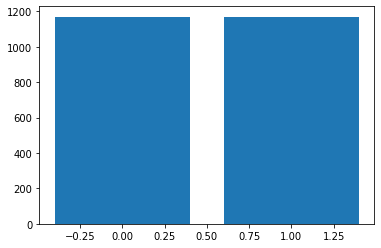

In [19]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train_over)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [20]:
y_train_over

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [21]:

df=pd.DataFrame(y_train_over)
df.columns = ['Pass/Fail']
df=pd.concat([df,x_train_over], axis=1)
df

,Pass/Fail,v0,v10,v100,v101,v102,v107,v108,v112,v113,...,v86,v87,v89,v9,v90,v91,v93,v94,v98,v99
0,0,0.706314,-0.086957,0.750000,-1.500000,0.114659,-0.084580,-0.209291,-0.318698,-1.233577,...,0.334300,0.090090,-0.562500,-0.718750,-0.654322,-0.603226,-0.307692,-1.000000,-1.511270,0.904362
1,0,0.664701,-1.113043,-0.500000,-2.000000,2.449927,0.715833,0.406846,0.473113,0.459854,...,0.056039,-1.180180,-0.029605,0.411458,0.093523,-1.180645,1.461538,-2.000000,-2.012563,0.703020
2,0,0.063310,0.417391,0.250000,1.000000,0.571843,0.967509,-0.056724,0.914159,-1.321168,...,-0.527536,-0.279279,0.907895,0.041667,-0.049568,-0.981720,0.153846,0.500000,0.959231,1.716443
3,0,-1.226370,0.495652,-0.250000,-1.000000,0.081277,-0.123775,0.195599,0.028120,-0.671533,...,0.604831,-2.396396,0.062500,-0.781250,1.931719,-0.377419,-3.692308,-1.000000,-1.071314,-1.904362
4,0,-0.325452,0.017391,1.250000,0.500000,0.651669,0.222795,0.403912,-0.401332,-0.452555,...,-0.233816,0.198198,0.131579,-0.432292,0.577946,-0.500000,-0.076923,1.000000,0.391674,2.137584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,1,1.594341,-0.479955,0.679205,0.070795,0.289355,-0.905853,0.979969,0.714886,-0.428462,...,0.780352,-0.127477,-0.058074,-1.428143,-0.123145,-1.352931,-0.664738,0.070795,-0.109601,0.551540
2336,1,-0.658660,-1.417819,0.341918,0.000000,-0.132652,0.382441,0.538107,1.692870,0.404282,...,-0.678706,0.197249,0.033390,-0.568513,0.297393,-0.086391,0.273193,0.394612,0.212479,0.685413
2337,1,0.687423,0.605770,1.469139,0.500000,0.526023,-2.944849,1.942975,0.700075,-0.898483,...,-1.092755,-1.415137,0.054897,0.389580,-0.452536,-1.725451,-0.969139,0.984569,0.525945,-0.690722
2338,1,1.597511,-0.479259,0.650588,0.000000,0.443287,-0.949143,1.019425,0.799278,-0.565355,...,0.696531,0.161751,-0.121539,-1.253872,-0.033325,-1.568328,-0.565140,-0.039765,-0.168865,0.608047


In [22]:
feature_columns = df.columns.difference(["Pass/Fail"])
x = df[feature_columns]
y = df[["Pass/Fail"]]
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1638, 226) (702, 226) (1638, 1) (702, 1)


In [23]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() #로지스틱 회귀분석 시행

log.fit(train_x, train_y) #모델의 정확도 확인
print('학습용 데이터셋 정확도 : %.2f' % log.score(train_x, train_y))
print('검증용 데이터셋 정확도 : %.2f' % log.score(test_x, test_y))

학습용 데이터셋 정확도 : 0.80
검증용 데이터셋 정확도 : 0.77


In [24]:
from sklearn.metrics import classification_report
y_pred=log.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       351
           1       0.78      0.75      0.77       351

    accuracy                           0.77       702
   macro avg       0.77      0.77      0.77       702
weighted avg       0.77      0.77      0.77       702



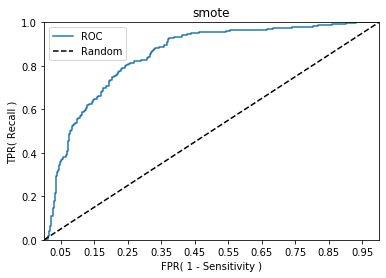

In [25]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(test_y ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('smote')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(test_y, log.predict_proba(test_x)[:, 1] )

## ADASYN
#### SMOTE의 개선된 버전이다. 동일한 프로세스를 진행한 후 점들에 임의의 작은 값을 더해줌으로써 조금 더 사실적인 데이터가 생성된다. 즉 모든 표본이 약간 더 분산된다.

In [26]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

print('Original dataset shape %s' % Counter(y_train))

ada = ADASYN(random_state=12)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', X_res.shape, y_res.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_res).value_counts())

Original dataset shape Counter({0: 1170, 1: 83})
Resampled dataset shape Counter({0: 1170, 1: 1150})
오버샘플링 전 : (1253, 226) (1253,)

오버샘플링 후 : (2320, 226) (2320,)

오버샘플링 전 레이블 분포 :
 0    1170
1      83
dtype: int64

오버샘플링 후 레이블 분포 :
 0    1170
1    1150
dtype: int64


In [27]:
df=pd.DataFrame(y_res)
df.columns = ['Pass/Fail']
df=pd.concat([df,X_res], axis=1)
df

,Pass/Fail,v0,v10,v100,v101,v102,v107,v108,v112,v113,...,v86,v87,v89,v9,v90,v91,v93,v94,v98,v99
0,0,0.706314,-0.086957,0.750000,-1.500000,0.114659,-0.084580,-0.209291,-0.318698,-1.233577,...,0.334300,0.090090,-0.562500,-0.718750,-0.654322,-0.603226,-0.307692,-1.000000,-1.511270,0.904362
1,0,0.664701,-1.113043,-0.500000,-2.000000,2.449927,0.715833,0.406846,0.473113,0.459854,...,0.056039,-1.180180,-0.029605,0.411458,0.093523,-1.180645,1.461538,-2.000000,-2.012563,0.703020
2,0,0.063310,0.417391,0.250000,1.000000,0.571843,0.967509,-0.056724,0.914159,-1.321168,...,-0.527536,-0.279279,0.907895,0.041667,-0.049568,-0.981720,0.153846,0.500000,0.959231,1.716443
3,0,-1.226370,0.495652,-0.250000,-1.000000,0.081277,-0.123775,0.195599,0.028120,-0.671533,...,0.604831,-2.396396,0.062500,-0.781250,1.931719,-0.377419,-3.692308,-1.000000,-1.071314,-1.904362
4,0,-0.325452,0.017391,1.250000,0.500000,0.651669,0.222795,0.403912,-0.401332,-0.452555,...,-0.233816,0.198198,0.131579,-0.432292,0.577946,-0.500000,-0.076923,1.000000,0.391674,2.137584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,1,0.289305,0.317467,-0.189446,0.000000,-0.374339,-0.411133,-0.294429,-2.080624,-0.403305,...,0.053826,0.060320,0.426857,0.285106,-0.159029,0.812930,0.522224,-0.378891,0.068321,0.520022
2316,1,-0.180869,0.290034,-0.008117,-0.241883,0.537910,-0.354430,-0.398933,-0.791228,0.041852,...,-0.598281,-0.900696,-0.235101,0.188210,-0.399588,0.518608,-0.054445,-0.500000,-0.279145,0.452475
2317,1,0.213029,0.400739,-0.365439,0.115439,-0.373952,-0.430383,-0.348205,-1.751833,-0.356599,...,0.016953,0.042965,0.490402,0.228702,-0.467545,0.907779,0.606505,-0.384561,0.239737,1.079045
2318,1,-0.259425,-0.314528,-0.250000,0.000000,-1.146223,-0.020144,-1.325026,0.899635,0.051843,...,0.289648,-0.055605,-0.832318,0.733109,-1.148574,0.641650,1.224123,-0.500000,-0.080930,-0.838367


In [28]:
feature_columns = df.columns.difference(["Pass/Fail"])
x = df[feature_columns]
y = df[["Pass/Fail"]]
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1624, 226) (696, 226) (1624, 1) (696, 1)


In [29]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() #로지스틱 회귀분석 시행

log.fit(train_x, train_y) #모델의 정확도 확인
print('학습용 데이터셋 정확도 : %.2f' % log.score(train_x, train_y))
print('검증용 데이터셋 정확도 : %.2f' % log.score(test_x, test_y))

학습용 데이터셋 정확도 : 0.79
검증용 데이터셋 정확도 : 0.75


In [30]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier()
tree.fit(train_x, train_y)

print('학습용 데이터셋 정확도 : %.2f' % log.score(train_x, train_y))
print('검증용 데이터셋 정확도 : %.2f' % log.score(test_x, test_y))

학습용 데이터셋 정확도 : 0.79
검증용 데이터셋 정확도 : 0.75


In [31]:
from sklearn.metrics import classification_report
y_pred=log.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       351
           1       0.73      0.80      0.76       345

    accuracy                           0.75       696
   macro avg       0.76      0.75      0.75       696
weighted avg       0.76      0.75      0.75       696



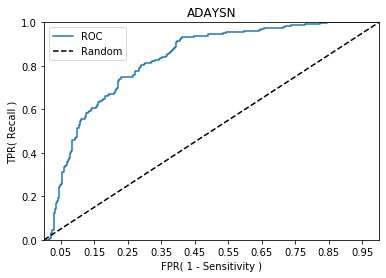

In [32]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(test_y ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('ADAYSN')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(test_y, log.predict_proba(test_x)[:, 1] )